In [39]:
import pandas as pd

all_statistic = pd.read_csv("all.statistics.csv")
routing_statistic = pd.read_csv("routing.statistics.csv")
search_statistic = pd.read_csv("search.statistics.csv")

statistics = {
    "All": all_statistic,
    "Routing": routing_statistic,
    "Search": search_statistic
}

NUM_OF_INCOMING_ELEMENTS = 'number of incoming elements (reloaded + change-file)'
DURATION_FOR_SPECIFIC_FILTERING = 'duration for specific-preprocessing (in ms)'
NUM_OF_PUBLISHED_ELEMENTS = 'number of published elements'
DURATION_COMPLETE = 'duration for preprocessing (in ms)'

In [40]:
# Number of changesets received
def num_of_rows(statistic: pd.DataFrame):
    return len(statistic)

In [41]:
from typing import Callable


def analysis(statistic: pd.DataFrame, col: str, index_func: str = None):
    index_func = getattr(statistic[col], index_func)
    index = index_func()
    row = statistic.iloc[index]
    value = row[col]
    return value, row

In [42]:
# Maximum number of elements found in a changeset (with reloaded)
def get_max_num_of_elements(statistic: pd.DataFrame):
    return analysis(statistic, NUM_OF_INCOMING_ELEMENTS, 'idxmax')

In [43]:
# Minimal number of elements found in a chageset
def get_min_num_of_elements(statistic: pd.DataFrame):
    return analysis(statistic, NUM_OF_INCOMING_ELEMENTS, 'idxmin')

In [44]:
# The mean num elements in a changeset
def get_mean_num_of_elements(statistic: pd.DataFrame):
    return statistic[NUM_OF_INCOMING_ELEMENTS].mean()

In [45]:
# The median num elements in a changeset
def get_median_num_of_elements(statistic: pd.DataFrame):
    return statistic[NUM_OF_INCOMING_ELEMENTS].median()

In [46]:
# Maximum duration for subject specific filtering
def get_maximum_duration_specific_filtering(statistic: pd.DataFrame):
    return analysis(statistic, DURATION_FOR_SPECIFIC_FILTERING, 'idxmax')

In [47]:
# Minimum duration for subject specific filtering
def get_minimum_duration_specific_filtering(statistic: pd.DataFrame):
    return analysis(statistic, DURATION_FOR_SPECIFIC_FILTERING, 'idxmin')

In [48]:
# Mean duration for subject specific filtering
def get_mean_duration_specific_filtering(statistic: pd.DataFrame):
    return statistic[DURATION_FOR_SPECIFIC_FILTERING].mean()

In [49]:
def get_maximum_duration_filtering(statistic: pd.DataFrame):
    return analysis(statistic, DURATION_COMPLETE, 'idxmax')

In [50]:
def get_minimum_duration_filtering(statistic: pd.DataFrame):
    return analysis(statistic, DURATION_COMPLETE, 'idxmin')

In [51]:
def get_mean_duration_filtering(statistic: pd.DataFrame):
    return statistic[DURATION_COMPLETE].mean()

In [52]:
# Maximum difference between received and published elements. Maximum amount of discarded elements by each subject.
def get_max_diff_received_published_elements(statistic: pd.DataFrame):
    index = (statistic[NUM_OF_INCOMING_ELEMENTS] - statistic[NUM_OF_PUBLISHED_ELEMENTS]).idxmax()
    row = statistic.iloc[index]
    value = row[NUM_OF_INCOMING_ELEMENTS] - row[NUM_OF_PUBLISHED_ELEMENTS]
    return value, row

In [53]:
# Minimum difference between received and published elements. Minimum amount of discarded elements by each subject.
def get_min_diff_received_published_elements(statistic: pd.DataFrame):
    index = (statistic[NUM_OF_INCOMING_ELEMENTS] - statistic[NUM_OF_PUBLISHED_ELEMENTS]).idxmin()
    row = statistic.iloc[index]
    value = row[NUM_OF_INCOMING_ELEMENTS] - row[NUM_OF_PUBLISHED_ELEMENTS]
    return value, row

In [54]:
# Mean difference between received and published elements. Mean amount of discarded elements by each subject
def get_mean_diff_received_published_elements(statistic: pd.DataFrame):
    value = (statistic[NUM_OF_INCOMING_ELEMENTS] - statistic[NUM_OF_PUBLISHED_ELEMENTS]).mean()
    return value

In [55]:
def get_percentage_mean_diff(statistic: pd.DataFrame):
    value = get_mean_diff_received_published_elements(statistic) / get_mean_num_of_elements(statistic)
    return value

In [56]:
def run_analysis(analysis: Callable, analysis_name: str):
    print(analysis_name + ":")
    for name, statistic in statistics.items():
        value = analysis(statistic)
        if type(value) is tuple:
            print(name + ": " + str(value[0]))
            for val in value[1:]:
                print(val)
            print("-------------")
        else:
            print((name + ':').ljust(20), value)

In [57]:
run_analysis(num_of_rows, "Num of rows")

Num of rows:
All:                 9951
Routing:             9951
Search:              9951


In [58]:
run_analysis(get_max_num_of_elements, "Maximum elements")

Maximum elements:
All: 209676
ID                                                      2022-04-06T23:35:30Z
number of incoming elements (reloaded + change-file)                  209676
number of reloaded nodes                                              153283
duration for preprocessing (in ms)                                     31102
number of published elements                                          209676
duration for specific-preprocessing (in ms)                             1736
Name: 1762, dtype: object
-------------
Routing: 209676
ID                                                      2022-04-06T23:35:29Z
number of incoming elements (reloaded + change-file)                  209676
number of reloaded nodes                                              153283
duration for preprocessing (in ms)                                     29408
number of published elements                                            1929
duration for specific-preprocessing (in ms)                        

In [59]:
run_analysis(get_min_num_of_elements, "Minimum elements")

Minimum elements:
All: 21
ID                                                      2022-04-10T00:44:19Z
number of incoming elements (reloaded + change-file)                      21
number of reloaded nodes                                                  18
duration for preprocessing (in ms)                                      2280
number of published elements                                              21
duration for specific-preprocessing (in ms)                                2
Name: 6092, dtype: object
-------------
Routing: 21
ID                                                      2022-04-10T00:44:19Z
number of incoming elements (reloaded + change-file)                      21
number of reloaded nodes                                                  18
duration for preprocessing (in ms)                                      2280
number of published elements                                               5
duration for specific-preprocessing (in ms)                                

In [60]:
run_analysis(get_mean_num_of_elements, "Mean elements per changeset")

Mean elements per changeset:
All:                 5002.555622550497
Routing:             5002.555622550497
Search:              5002.555622550497


In [61]:
run_analysis(get_median_num_of_elements, "Median elements per changeset")

Median elements per changeset:
All:                 4224.0
Routing:             4224.0
Search:              4224.0


In [62]:
run_analysis(get_maximum_duration_specific_filtering, "Maximum duration for specific filtering")

Maximum duration for specific filtering:
All: 12627
ID                                                      2022-04-12T09:21:05Z
number of incoming elements (reloaded + change-file)                    7736
number of reloaded nodes                                                4300
duration for preprocessing (in ms)                                     15794
number of published elements                                            7736
duration for specific-preprocessing (in ms)                            12627
Name: 9444, dtype: object
-------------
Routing: 6626
ID                                                      2022-04-10T08:39:30Z
number of incoming elements (reloaded + change-file)                    4505
number of reloaded nodes                                                3229
duration for preprocessing (in ms)                                      9273
number of published elements                                            1915
duration for specific-preprocessing (in ms)    

In [63]:
run_analysis(get_minimum_duration_specific_filtering, "Minimum duration for specific filtering")

Minimum duration for specific filtering:
All: 1
ID                                                      2022-04-09T03:48:45Z
number of incoming elements (reloaded + change-file)                      29
number of reloaded nodes                                                  25
duration for preprocessing (in ms)                                      2036
number of published elements                                              29
duration for specific-preprocessing (in ms)                                1
Name: 4854, dtype: object
-------------
Routing: 0
ID                                                      2022-04-09T01:29:37Z
number of incoming elements (reloaded + change-file)                    1019
number of reloaded nodes                                                 448
duration for preprocessing (in ms)                                       784
number of published elements                                              14
duration for specific-preprocessing (in ms)           

In [64]:
run_analysis(get_mean_duration_specific_filtering, "Mean duration for specific filtering")

Mean duration for specific filtering:
All:                 68.7165109034268
Routing:             31.81800824037785
Search:              19.892774595518038


In [65]:
run_analysis(get_max_diff_received_published_elements, "Max difference between received and published")

Max difference between received and published:
All: 0
ID                                                      2022-04-05T17:50:44Z
number of incoming elements (reloaded + change-file)                    2700
number of reloaded nodes                                                 992
duration for preprocessing (in ms)                                      3250
number of published elements                                            2700
duration for specific-preprocessing (in ms)                               89
Name: 0, dtype: object
-------------
Routing: 207747
ID                                                      2022-04-06T23:35:29Z
number of incoming elements (reloaded + change-file)                  209676
number of reloaded nodes                                              153283
duration for preprocessing (in ms)                                     29408
number of published elements                                            1929
duration for specific-preprocessing (in ms)   

In [66]:
run_analysis(get_min_diff_received_published_elements, "Min difference between received and published")

Min difference between received and published:
All: 0
ID                                                      2022-04-05T17:50:44Z
number of incoming elements (reloaded + change-file)                    2700
number of reloaded nodes                                                 992
duration for preprocessing (in ms)                                      3250
number of published elements                                            2700
duration for specific-preprocessing (in ms)                               89
Name: 0, dtype: object
-------------
Routing: 0
ID                                                      2022-04-09T03:48:45Z
number of incoming elements (reloaded + change-file)                      29
number of reloaded nodes                                                  25
duration for preprocessing (in ms)                                      2041
number of published elements                                              29
duration for specific-preprocessing (in ms)        

In [67]:
run_analysis(get_mean_diff_received_published_elements, "Mean difference between received and published")

Mean difference between received and published:
All:                 0.0
Routing:             3395.9457340970757
Search:              4924.220480353733


In [68]:
run_analysis(get_maximum_duration_filtering, "Maximum duration filtering")

Maximum duration filtering:
All: 43359
ID                                                      2022-04-06T09:49:45Z
number of incoming elements (reloaded + change-file)                    6099
number of reloaded nodes                                                3046
duration for preprocessing (in ms)                                     43359
number of published elements                                            6099
duration for specific-preprocessing (in ms)                               63
Name: 947, dtype: object
-------------
Routing: 43320
ID                                                      2022-04-06T09:49:45Z
number of incoming elements (reloaded + change-file)                    6099
number of reloaded nodes                                                3046
duration for preprocessing (in ms)                                     43320
number of published elements                                            1559
duration for specific-preprocessing (in ms)                 

In [69]:
run_analysis(get_minimum_duration_filtering, "Minimum duration filtering")

Minimum duration filtering:
All: 43
ID                                                      2022-04-06T01:57:14Z
number of incoming elements (reloaded + change-file)                      56
number of reloaded nodes                                                   0
duration for preprocessing (in ms)                                        43
number of published elements                                              56
duration for specific-preprocessing (in ms)                                4
Name: 481, dtype: object
-------------
Routing: 41
ID                                                      2022-04-06T01:57:14Z
number of incoming elements (reloaded + change-file)                      56
number of reloaded nodes                                                   0
duration for preprocessing (in ms)                                        41
number of published elements                                              10
duration for specific-preprocessing (in ms)                       

In [70]:
run_analysis(get_mean_duration_filtering, "Mean duration filtering")

Mean duration filtering:
All:                 3903.2198773992563
Routing:             3866.064214651794
Search:              3854.091347603256


In [71]:
sum_incoming = statistics["All"][NUM_OF_INCOMING_ELEMENTS].sum()
print(sum_incoming)

49780431


In [72]:
sum_routing_published = statistics["Routing"][NUM_OF_PUBLISHED_ELEMENTS].sum()
print(sum_routing_published)

15987375


In [73]:
percentage_routing = sum_routing_published / sum_incoming
print(1 - percentage_routing)

0.6788421739458221


In [74]:
sum_search = statistics["Search"][NUM_OF_PUBLISHED_ELEMENTS].sum()
print(sum_search)

779513


In [75]:
percentage_search = sum_search / sum_incoming
print(1 - percentage_search)

0.9843409752719899


In [76]:
run_analysis(get_percentage_mean_diff, "Mean percentage diff")

Mean percentage diff:
All:                 0.0
Routing:             0.6788421739458222
Search:              0.98434097527199


In [79]:
statistics["Search"].sort_values([DURATION_COMPLETE], ascending=False)

,ID,number of incoming elements (reloaded + change-file),number of reloaded nodes,duration for preprocessing (in ms),number of published elements,duration for specific-preprocessing (in ms)
5568,2022-04-09T15:54:40Z,133726,113485,123035,37252,107862
947,2022-04-06T09:49:45Z,6099,3046,43293,16,0
1762,2022-04-06T23:35:29Z,209676,153283,29431,2606,65
4073,2022-04-08T14:37:35Z,25872,4689,25302,106,4
1216,2022-04-06T14:22:11Z,5889,2707,25148,33,2
...,...,...,...,...,...,...
6408,2022-04-10T06:05:19Z,500,0,55,0,0
4716,2022-04-09T01:28:26Z,565,0,51,0,0
7520,2022-04-11T00:51:27Z,255,0,47,7,2
7500,2022-04-11T00:31:16Z,417,0,44,1,0


In [80]:
statistics["Routing"].sort_values([DURATION_COMPLETE], ascending=False)

,ID,number of incoming elements (reloaded + change-file),number of reloaded nodes,duration for preprocessing (in ms),number of published elements,duration for specific-preprocessing (in ms)
947,2022-04-06T09:49:45Z,6099,3046,43320,1559,27
1762,2022-04-06T23:35:29Z,209676,153283,29408,1929,42
4073,2022-04-08T14:37:35Z,25872,4689,25350,5337,52
1216,2022-04-06T14:22:11Z,5889,2707,25176,1615,28
1432,2022-04-06T18:00:57Z,9724,4770,22180,2821,62
...,...,...,...,...,...,...
6408,2022-04-10T06:05:19Z,500,0,57,28,2
4716,2022-04-09T01:28:26Z,565,0,55,1,3
7500,2022-04-11T00:31:16Z,417,0,52,14,1
7520,2022-04-11T00:51:27Z,255,0,47,8,2


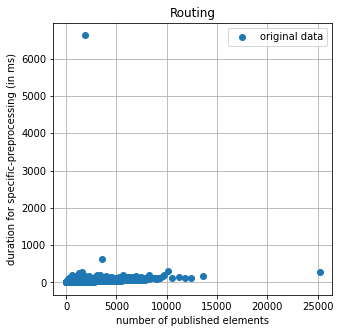

In [143]:
FILTER_ATTRIBUTE = DURATION_FOR_SPECIFIC_FILTERING
STATISTIC = "Routing"
search_filtered_dataframe = (
    statistics[STATISTIC][statistics[STATISTIC][FILTER_ATTRIBUTE] < 10000].sort_values([NUM_OF_PUBLISHED_ELEMENTS]))

import matplotlib.pyplot as plt
from scipy.stats import linregress

x = search_filtered_dataframe[NUM_OF_PUBLISHED_ELEMENTS]
y = search_filtered_dataframe[FILTER_ATTRIBUTE]

plt.figure(figsize=(5, 5))
plt.plot(x, y, 'o', label="original data")
plt.title(STATISTIC)
# plt.axhline(y=60000, color='r')
plt.xlabel(NUM_OF_PUBLISHED_ELEMENTS)
plt.ylabel(FILTER_ATTRIBUTE)
plt.legend()
plt.grid()
plt.show()

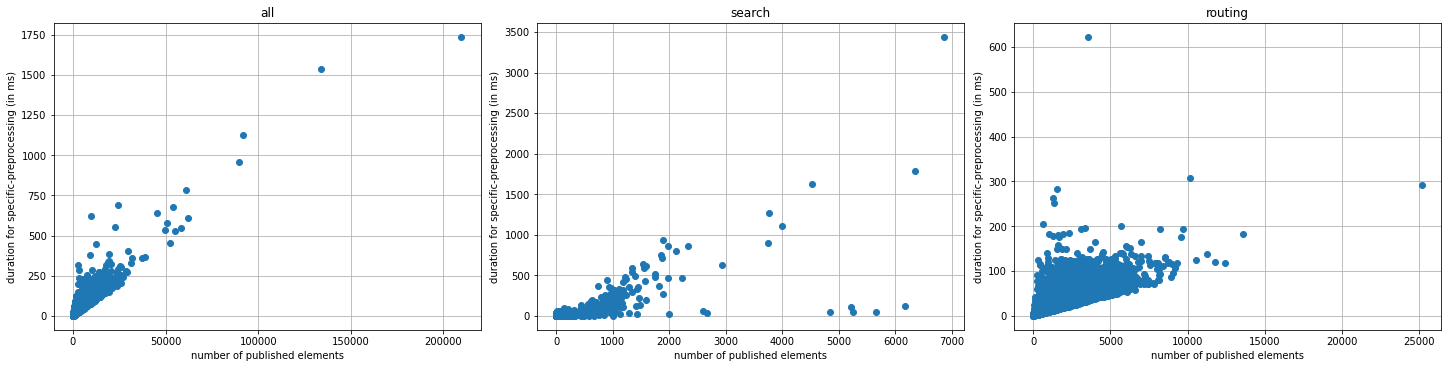

In [192]:
FILTER_ATTRIBUTE = DURATION_FOR_SPECIFIC_FILTERING
X_AXIS_VALUE = NUM_OF_PUBLISHED_ELEMENTS
search_dataframe = statistics["Search"]
search_filtered_dataframe = search_dataframe[search_dataframe[FILTER_ATTRIBUTE] < 100000].sort_values([X_AXIS_VALUE])
search_x = search_filtered_dataframe[X_AXIS_VALUE]
search_y = search_filtered_dataframe[FILTER_ATTRIBUTE]

routing_dataframe = statistics["Routing"]
routing_filtered_dataframe = routing_dataframe[routing_dataframe[FILTER_ATTRIBUTE] < 6000].sort_values([X_AXIS_VALUE])
routing_x = routing_filtered_dataframe[X_AXIS_VALUE]
routing_y = routing_filtered_dataframe[FILTER_ATTRIBUTE]

all_dataframe = statistics["All"]
all_filtered_dataframe = all_dataframe[all_dataframe[FILTER_ATTRIBUTE] < 6000].sort_values([X_AXIS_VALUE])
all_x = all_filtered_dataframe[X_AXIS_VALUE]
all_y = all_filtered_dataframe[FILTER_ATTRIBUTE]

fig, axs = plt.subplots(1, 3, figsize=(20, 5), constrained_layout=True)

axs[0].plot(all_x, all_y, 'o')
axs[0].set_title("all")
axs[0].grid()
axs[1].plot(search_x, search_y, 'o')
axs[1].set_title("search")
axs[1].grid()
axs[2].plot(routing_x, routing_y, 'o')
axs[2].set_title("routing")
axs[2].grid()

for ax in axs.flat:
    ax.set(xlabel=X_AXIS_VALUE, ylabel=FILTER_ATTRIBUTE)

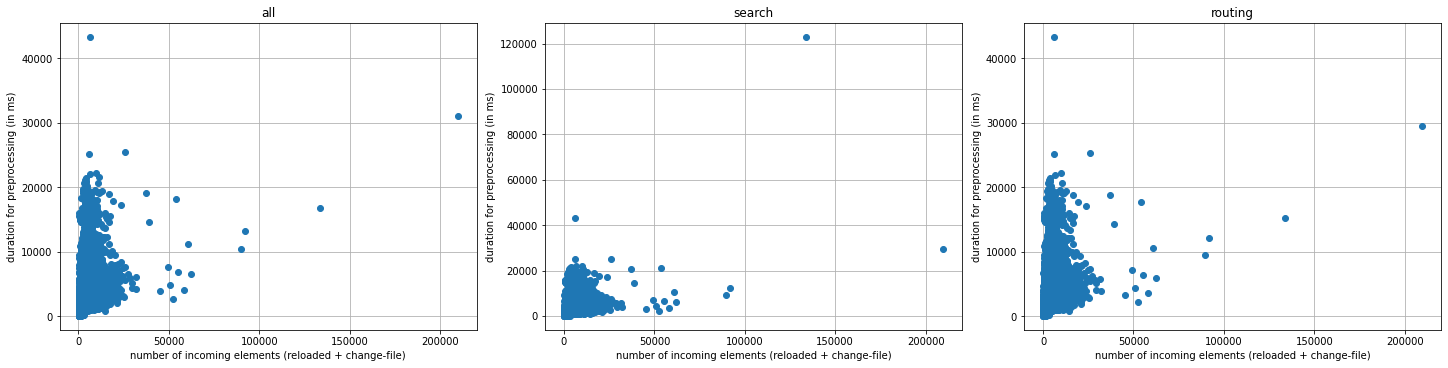

In [185]:
FILTER_ATTRIBUTE = DURATION_COMPLETE
X_AXIS_VALUE = NUM_OF_INCOMING_ELEMENTS
search_dataframe = statistics["Search"]
search_filtered_dataframe = search_dataframe[search_dataframe[FILTER_ATTRIBUTE] > -1].sort_values([X_AXIS_VALUE])
search_x = search_filtered_dataframe[X_AXIS_VALUE]
search_y = search_filtered_dataframe[FILTER_ATTRIBUTE]

routing_dataframe = statistics["Routing"]
routing_filtered_dataframe = routing_dataframe[routing_dataframe[FILTER_ATTRIBUTE] > -1].sort_values([X_AXIS_VALUE])
routing_x = routing_filtered_dataframe[X_AXIS_VALUE]
routing_y = routing_filtered_dataframe[FILTER_ATTRIBUTE]

all_dataframe = statistics["All"]
all_filtered_dataframe = all_dataframe[all_dataframe[FILTER_ATTRIBUTE] > -1].sort_values([X_AXIS_VALUE])
all_x = all_filtered_dataframe[X_AXIS_VALUE]
all_y = all_filtered_dataframe[FILTER_ATTRIBUTE]

fig, axs = plt.subplots(1, 3, figsize=(20, 5), constrained_layout=True)

axs[0].plot(all_x, all_y, 'o')
axs[0].set_title("all")
axs[0].grid()
axs[1].plot(search_x, search_y, 'o')
axs[1].set_title("search")
axs[1].grid()
axs[2].plot(routing_x, routing_y, 'o')
axs[2].set_title("routing")
axs[2].grid()

for ax in axs.flat:
    ax.set(xlabel=X_AXIS_VALUE, ylabel=FILTER_ATTRIBUTE)